In [116]:
from itertools import permutations 
from itertools import combinations
from scipy.special import comb
from numpy.random import choice as sample

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
houses = ['brobnar', 'logos', 'shadows', 'sanctum', 'mars', 'dis', 'untamed']
all_possible = list(combinations(houses, 3))
count = len(all_possible)


35


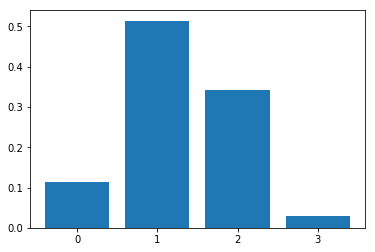

{0: 0.11428571428571428, 1: 0.5142857142857142, 2: 0.34285714285714286, 3: 0.02857142857142857}


In [145]:
# combinatorics soln
grouped_comb = {}
grouped_comb[0] = comb(4,3) / comb(7,3)
grouped_comb[1] = comb(3,1) * comb(4, 2) / comb(7,3)
grouped_comb[2] = comb(3, 2) * comb(4, 1) / comb(7,3)
grouped_comb[3] = 1/count

plt.bar(range(len(grouped_comb)), list(grouped_comb.values()), align='center')
plt.xticks(range(len(grouped_comb)), list(grouped_comb.keys()))
plt.show()

print(grouped_comb)

grouped_comb = shared

In [164]:
# monte carlo soln
deck = lambda : sample(houses, 3, replace=False)

def monte(iters):
    results = []
    for i in range(iters):
        deck1, deck2 = deck(), deck()
        inter = set(deck1).intersection(set(deck2))
        results.append(len(inter))
    grouped = { k: v/iters for k,v in Counter(results).items() }
    for k in range(0, 4):
        if not k in grouped:
            grouped[k] = 0
               
    return grouped

{2: 0.2, 1: 0.5, 0: 0.3, 3: 0}


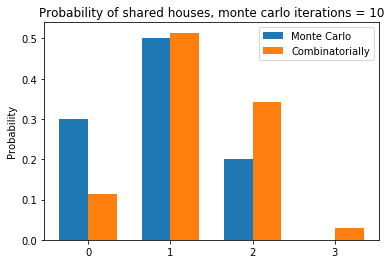

{1: 0.52, 2: 0.38, 0: 0.1, 3: 0}


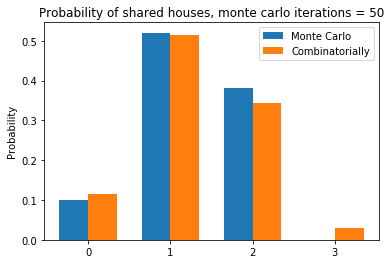

{1: 0.45, 2: 0.4, 0: 0.14, 3: 0.01}


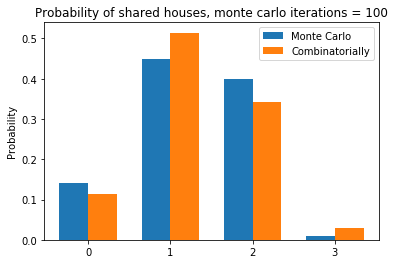

{2: 0.348, 1: 0.5, 0: 0.122, 3: 0.03}


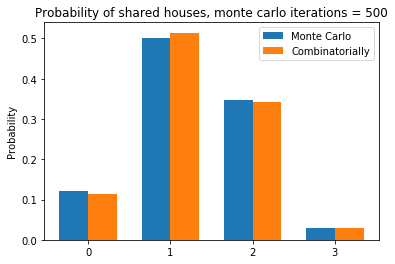

{0: 0.11, 1: 0.522, 2: 0.345, 3: 0.023}


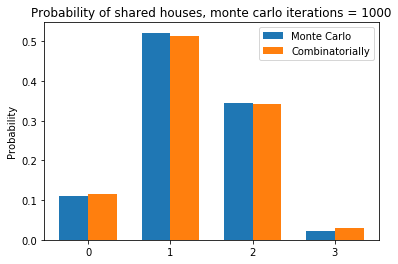

{0: 0.1142, 1: 0.5032, 2: 0.3532, 3: 0.0294}


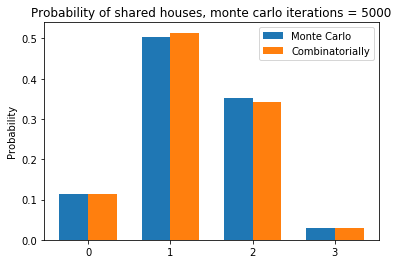

In [172]:


def compare(iters):
    N = 4
    ind = np.arange(N)
    width = 0.35
    
    grouped_monte = monte(iters)
    monte_values = [grouped_monte[k] for k in sorted(grouped_monte.keys())]
    comb_values = [grouped_comb[k] for k in sorted(grouped_comb.keys())]
    plt.bar(ind, monte_values, width, label='Monte Carlo')
    plt.bar(ind + width, comb_values, width, label='Combinatorially')

    plt.ylabel('Probability')
    plt.title('Probability of shared houses, monte carlo iterations = ' + str(iters))

    plt.xticks(ind + width / 2, ind)
    plt.legend(loc='best')
    plt.show()
    
compare(10)
compare(50)
compare(100)
compare(500)
compare(1000)
compare(5000)
